Importamos las bibliotecas necesarias para el procesamiento de imágenes y desarrollo del proyecto:
- **Pillow (PIL):** Esta biblioteca es ampliamente utilizada para trabajar con imágenes. Proporciona una amplia gama de funciones para cargar, manipular y guardar imágenes en varios formatos. En tu proyecto, se utiliza para cargar y convertir imágenes.

- **Numpy:** Numpy es una biblioteca fundamental para la computación científica en Python. Ofrece soporte para arreglos multidimensionales y una variedad de funciones para realizar operaciones matemáticas en esos arreglos. En tu proyecto, se utiliza para representar imágenes como arreglos y realizar cálculos en los píxeles de las imágenes.

- **OpenCV (cv2):** OpenCV es una biblioteca popular para la visión por computadora y el procesamiento de imágenes. Ofrece una amplia gama de funciones para tareas como detección de bordes, filtrado, transformaciones geométricas y más. En tu proyecto, podrías utilizar OpenCV para tareas de procesamiento de imágenes avanzadas.

- **Matplotlib:** Matplotlib es una biblioteca utilizada para crear visualizaciones y gráficos en Python. Es especialmente útil para mostrar imágenes y gráficos en entornos de cuadernos como Jupyter Notebook. En tu proyecto, Matplotlib se utiliza para mostrar imágenes y gráficos relacionados con el análisis de imágenes.

- **Scipy:** Scipy es una biblioteca que se basa en Numpy y proporciona una amplia variedad de algoritmos y herramientas para realizar cálculos científicos y técnicos. Contiene módulos que abordan problemas en ámbitos como la optimización, la estadística y el procesamiento de señales. En tu proyecto, podrías utilizar Scipy para tareas de procesamiento de imágenes más avanzadas y análisis.


In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [ ]:
# Definimos la clase 'ProcesadorImagen' que se utilizará para procesar imágenes.
class ProcesadorImagen: 
    def __init__(self, imagen_ruta): #Inicializamosla instancia de la clase con la ruta de la imagen.
    self.imagen_ruta = imagen_ruta
    self.imagen = Image.open(imagen_ruta) #Cargamos la imagen utilizando Pillow (PIL)
    self.imagen_array = np.array(self.imagen) #La convertimos en un arreglo de NumPy para facilitar el procesamiento
    #Extraimos los canales R(Red), G(Green) y B(Blue)
    self.canal_r = self.imagen_array[:, :, 0]
    self.canal_g = self.imagen_array[:, :, 1]
    self.canal_b = self.imagen_array[:, :, 2]


In [ ]:
def verificar_tipo_ruta(self): #Este método nos permite verificar si la ruta de la imagen es una cadea (str)
    if isinstance(self.imagen_ruta, str):
        print("La ruta es una cadena (str).") # Si cumple con la condición nos imprime un mensaje informativo
        self.mostrar_imagen_con_array(self.imagen, 'Imagen Original') # Llama al método para mostrar la imagen original con el título 'Imagen Original'.


En este paso obtenemos verificación de la ruta para poder cargar la imagen correctamente y proporcionamos una vista previa de la imagen original al usuario.

In [34]:
    # Este método muestra una imagen dada su representación en forma de arreglo numpy
    def mostrar_imagen_con_array(self, imagen, titulo):
        imagen_array = np.array(imagen)
        plt.figure(figsize=(6, 6))
        plt.imshow(imagen_array)
        plt.title(titulo)
        plt.axis('off')
        plt.show()
        print("La ruta es una cadena (str).")
        print(f"Forma del array de la imagen: {imagen_array.shape}")
        print(f"{titulo}:\n {imagen_array}")

    # Este método muestra un canal de la imagen en forma de imagen
    def mostrar_canal(self, canal, titulo):
        plt.figure(figsize=(5, 5))
        plt.imshow(canal, cmap='Reds' if titulo == 'Canal R (Rojo)' else 'Greens' if titulo == 'Canal G (Verde)' else 'Blues')
        plt.title(titulo)
        plt.axis('off')
        plt.show()

    # Calcula la intensidad promedio de un canal RGB
    def calcular_intensidad_promedio(self, canal_rgb):
        intensidad_promedio = np.mean(canal_rgb)
        return intensidad_promedio

    # Calcula la intensidad y la entropía de una imagen en escala de grises a partir de un canal eliminado
    def calcular_intensidad_entropia_sin_canal(self, canal_a_mantener):
        if canal_a_mantener == "R":
            imagen_sin_canal = self.crear_imagen_sin_canal("R")
        elif canal_a_mantener == "G":
            imagen_sin_canal = self.crear_imagen_sin_canal("G")
        elif canal_a_mantener == "B":
            imagen_sin_canal = self.crear_imagen_sin_canal("B")

        canal_sin_canal = imagen_sin_canal.convert("L")  # Convierte a escala de grises
        canal_sin_canal_array = np.array(canal_sin_canal)  # Convierte a arreglo numpy
        intensidad_promedio = self.calcular_intensidad_promedio(canal_sin_canal_array)
        entropia = self.calcular_entropia(canal_sin_canal_array)

        return intensidad_promedio, entropia

    # Determina el canal con mayor intensidad promedio
    def determinar_canal_mas_evidente(self):
        intensidad_promedio_r = self.calcular_intensidad_promedio(self.canal_r)
        intensidad_promedio_g = self.calcular_intensidad_promedio(self.canal_g)
        intensidad_promedio_b = self.calcular_intensidad_promedio(self.canal_b)

        canales = ["R (Rojo)", "G (Verde)", "B (Azul)"]
        intensidades = [intensidad_promedio_r, intensidad_promedio_g, intensidad_promedio_b]
        canal_mas_evidente = canales[np.argmax(intensidades)]

        print(f"La herida es más evidente en el Canal {canal_mas_evidente}")

    # Muestra la imagen volteada horizontalmente
    def mostrar_imagen_volteada(self):
        imagen_volteada = np.fliplr(self.imagen_array)
        plt.figure(figsize=(5, 5))
        plt.imshow(imagen_volteada)
        plt.title('Imagen Volteada Horizontalmente')
        plt.axis('off')
        plt.show()

    # Obtiene la imagen volteada horizontalmente en forma de arreglo numpy
    def obtener_imagen_volteada(self):
        return np.fliplr(self.imagen_array)

    # Muestra un canal volteado horizontalmente
    def mostrar_canal_volteado(self, canal, titulo):
        canal_volteado = np.fliplr(canal)
        plt.figure(figsize=(5, 5))
        plt.imshow(canal_volteado, cmap='Reds' if titulo == 'Canal R Volteado Horizontalmente' else 'Greens' if titulo == 'Canal G Volteado Horizontalmente' else 'Blues')
        plt.title(titulo)
        plt.axis('off')
        plt.show()

    # Calcula la entropía de una imagen en escala de grises
    def calcular_entropia(self, canal):
        entropia = entropy(canal.flatten())
        return entropia

    # Determina el canal con mayor entropía, lo que significa más información
    def determinar_canal_con_mas_informacion(self):
        entropy_r = self.calcular_entropia(self.canal_r)
        entropy_g = self.calcular_entropia(self.canal_g)
        entropy_b = self.calcular_entropia(self.canal_b)

        canales = ["R (Rojo)", "G (Verde)", "B (Azul)"]
        entropias = [entropy_r, entropy_g, entropy_b]
        canal_con_mas_informacion = canales[np.argmax(entropias)]

        print(f"El canal con más información es el Canal {canal_con_mas_informacion}")

    # Crea una nueva imagen eliminando un canal específico
    def crear_imagen_sin_canal(self, canal_a_mantener):
        nueva_imagen_array = np.copy(self.imagen_array)
        if canal_a_mantener == "R":
            nueva_imagen_array[:, :, 0] = 0  # Establecer el canal rojo a cero, excepto la primera columna
        elif canal_a_mantener == "G":
            nueva_imagen_array[:, :, 1] = 0  # Establecer el canal verde a cero, excepto la primera columna
        elif canal_a_mantener == "B":
            nueva_imagen_array[:, :, 2] = 0  # Establecer el canal azul a cero, excepto la primera columna

        nueva_imagen = Image.fromarray(nueva_imagen_array)
        return nueva_imagen

    # Crea una nueva imagen eliminando el Canal Verde
    def crear_imagen_sin_canal_verde(self):
        nueva_imagen_array = np.copy(self.imagen_array)
        nueva_imagen_array[:, :, 1] = 0  # Establecer el canal verde a cero
        nueva_imagen = Image.fromarray(nueva_imagen_array)
        return nueva_imagen

    # Crea una nueva imagen eliminando el Canal Azul
    def crear_imagen_sin_canal_azul(self):
        nueva_imagen_array = np.copy(self.imagen_array)
        nueva_imagen_array[:, :, 2] = 0  # Establecer el canal azul a cero
        nueva_imagen = Image.fromarray(nueva_imagen_array)
        return nueva_imagen

    def mostrar_imagenes_sin_canales(self):
        # Crear y mostrar una nueva imagen sin el Canal Rojo
        nueva_imagen_sin_rojo = self.crear_imagen_sin_canal("R")
        self.mostrar_imagen_con_array(nueva_imagen_sin_rojo, 'Imagen sin Canal Rojo')

        # Crear y mostrar una nueva imagen sin el Canal Verde
        nueva_imagen_sin_verde = self.crear_imagen_sin_canal("G")
        self.mostrar_imagen_con_array(nueva_imagen_sin_verde, 'Imagen sin Canal Verde')

        # Crear y mostrar una nueva imagen sin el Canal Azul
        nueva_imagen_sin_azul = self.crear_imagen_sin_canal("B")
        self.mostrar_imagen_con_array(nueva_imagen_sin_azul, 'Imagen sin Canal Azul')


A continuación usaremos los métodos definidos en la clase para realizar análisis y muestras que nos den claridad sobre el objetivo del ejercicio

La ruta es una cadena (str).


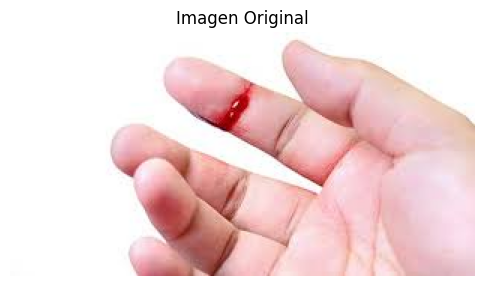

La ruta es una cadena (str).
Forma del array de la imagen: (163, 310, 3)
Imagen Original:
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [230 192 203]
  [231 193 206]
  [231 193 204]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [230 192 205]
  [231 193 206]
  [231 193 206]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [230 192 205]
  [231 193 206]
  [231 193 206]]]


In [3]:
procesador = ProcesadorImagen("Herida_2.jpg")

procesador.verificar_tipo_ruta()

Al usar el método procesador deimagen obtenemos la verificación de que la ruta de la imagen es una string(str) para confirmar que no se presenten errores al cargar otro tipo de datos. 
Obtenemos una visualización de la imagen original para que el usuario se familiarice con ella.
Obtenemos la composición de la imagen como arrays y sus dimensiones.

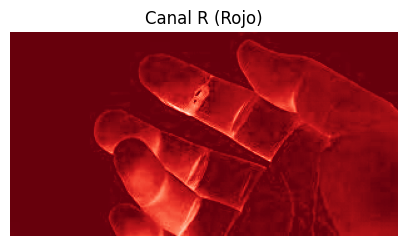

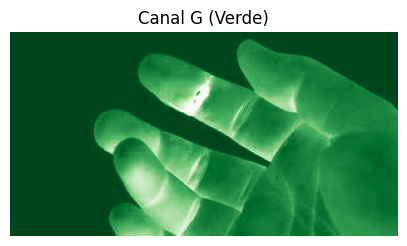

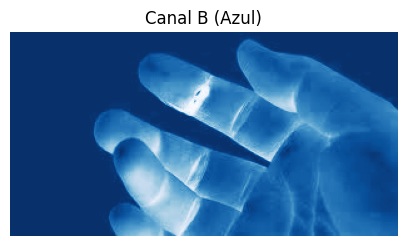

In [10]:
imagen_solo_rojo = procesador.mostrar_canal(procesador.canal_r, 'Canal R (Rojo)')
imagen_solo_verde = procesador.mostrar_canal(procesador.canal_g, 'Canal G (Verde)')
imagen_solo_azul = procesador.mostrar_canal(procesador.canal_b, 'Canal B (Azul)')

Obtenemos una representación gráfica de la imagen original mostrando solamente un canal a la vez para comenzar a sacar información de cada una de las representaciones.

La intensidad es un valor quenos indica el brillo general de una imagen o de un acal de color de una imagen. Esto nos permite cuantificar cuán luminoso es un canal especifico. Si el valor es más alto indica una mayor luminosidad y si es bajo una menor luminosidad. Este dato es útil para evaluar la presencia de áreas más claras o más oscuras dentro de una imagen.
La entropía se utiliza para medir la cantidad de información o desorden en una imagen o en un canal de color. Cuanto mayor sea el valor de la entropía, mayorserá la cantidad de detalles y variaciones en la imagen. Una alta entropía sugiere que la imagen contiene una mayor diversidad de tonos y texturas, lo que generalmente. indica una imagen más compleja o con mayor detalle.

In [15]:
# Obtenemos los datos de los canales individuales
canal_rojo = procesador.canal_r
canal_verde = procesador.canal_g
canal_azul = procesador.canal_b

# Calculamos la intensidad y la entropía de cada canal
intensidad_rojo = procesador.calcular_intensidad_promedio(canal_rojo)
entropia_rojo = procesador.calcular_entropia(canal_rojo)

intensidad_verde = procesador.calcular_intensidad_promedio(canal_verde)
entropia_verde = procesador.calcular_entropia(canal_verde)

intensidad_azul = procesador.calcular_intensidad_promedio(canal_azul)
entropia_azul = procesador.calcular_entropia(canal_azul)

print(f"Intensidad promedio del Canal Rojo: {intensidad_rojo}")
print(f"Entropía del Canal Rojo: {entropia_rojo}")

print(f"Intensidad promedio del Canal Verde: {intensidad_verde}")
print(f"Entropía del Canal Verde: {entropia_verde}")

print(f"Intensidad promedio del Canal Azul: {intensidad_azul}")
print(f"Entropía del Canal Azul: {entropia_azul}")


Intensidad promedio del Canal Rojo: 240.5609736790026
Entropía del Canal Rojo: 10.82530490609953
Intensidad promedio del Canal Verde: 211.3455768850188
Entropía del Canal Verde: 10.797521838846798
Intensidad promedio del Canal Azul: 212.15434395408667
Entropía del Canal Azul: 10.796860318634067


Obtenemos que la imagen con mayor intensidad es el canal rojo y la imagen con la mayor entropía tambien es la del canal rojo.
Por lo tanto podemos concluir en este primer ejercicio que la imagen con mayor luminosidad (intensidad) y con mayor detalle y complejidad (entropía) según los datos es la imagen de color rojo.

In [16]:
procesador.determinar_canal_mas_evidente()

La herida es más evidente en el Canal R (Rojo)


Usando el método para determinar el canal con mayor información obtenemos el mismo dato que el sacado inferencialmente de los datos.

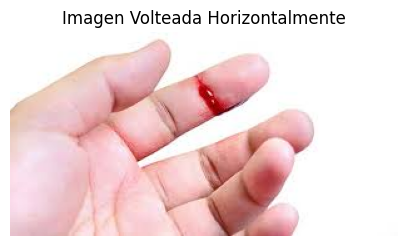

Forma del array de la imagen volteada: (163, 310, 3)


In [19]:
procesador.mostrar_imagen_volteada()
array_imagen_volteada = procesador.obtener_imagen_volteada()
print(f"Forma del array de la imagen volteada: {array_imagen_volteada.shape}")

Giramos la imagen para obtener una representación horizontal de la imagen para una mejor visualización de la imagen y obtenemos la información del tamaño y forma del array.

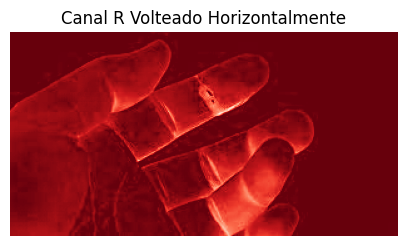

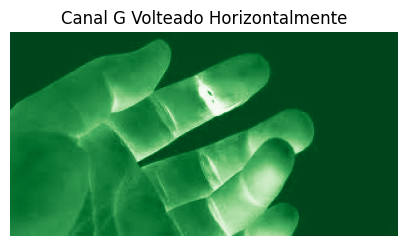

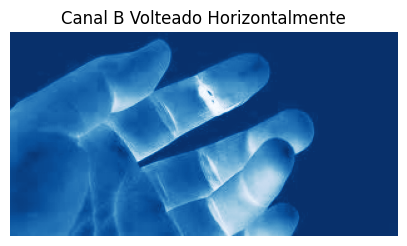

In [20]:
procesador.mostrar_canal_volteado(procesador.canal_r, 'Canal R Volteado Horizontalmente')
procesador.mostrar_canal_volteado(procesador.canal_g, 'Canal G Volteado Horizontalmente')
procesador.mostrar_canal_volteado(procesador.canal_b, 'Canal B Volteado Horizontalmente')

Generamos la representación gráfica de la imagen girada en cada uno de los canales.

In [21]:
procesador.determinar_canal_con_mas_informacion()

El canal con más información es el Canal R (Rojo)


Llamamos al método para determinar nuevamente cual es el canal con mayor información y continúa siendo el canal rojo ya que solo hemos girado la imagen y no hemos realizado cambios de fondo a la imagen.

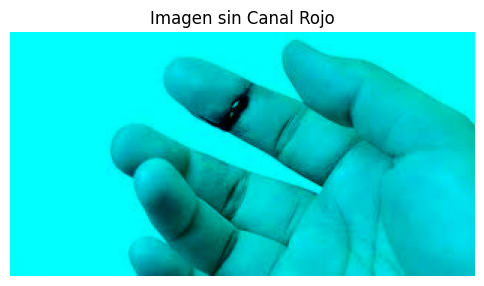

La ruta es una cadena (str).
Forma del array de la imagen: (163, 310, 3)
Imagen sin Canal Rojo:
 [[[  0 255 255]
  [  0 255 255]
  [  0 255 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]

 [[  0 255 255]
  [  0 255 255]
  [  0 255 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]

 [[  0 255 255]
  [  0 255 255]
  [  0 255 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]

 ...

 [[  0 252 252]
  [  0 252 252]
  [  0 252 252]
  ...
  [  0 192 203]
  [  0 193 206]
  [  0 193 204]]

 [[  0 252 252]
  [  0 252 252]
  [  0 252 252]
  ...
  [  0 192 205]
  [  0 193 206]
  [  0 193 206]]

 [[  0 252 252]
  [  0 252 252]
  [  0 252 252]
  ...
  [  0 192 205]
  [  0 193 206]
  [  0 193 206]]]


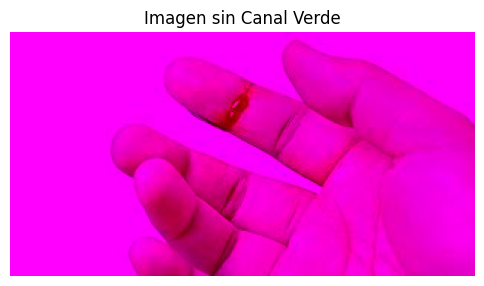

La ruta es una cadena (str).
Forma del array de la imagen: (163, 310, 3)
Imagen sin Canal Verde:
 [[[255   0 255]
  [255   0 255]
  [255   0 255]
  ...
  [255   0 255]
  [255   0 255]
  [255   0 255]]

 [[255   0 255]
  [255   0 255]
  [255   0 255]
  ...
  [255   0 255]
  [255   0 255]
  [255   0 255]]

 [[255   0 255]
  [255   0 255]
  [255   0 255]
  ...
  [255   0 255]
  [255   0 255]
  [255   0 255]]

 ...

 [[252   0 252]
  [252   0 252]
  [252   0 252]
  ...
  [230   0 203]
  [231   0 206]
  [231   0 204]]

 [[252   0 252]
  [252   0 252]
  [252   0 252]
  ...
  [230   0 205]
  [231   0 206]
  [231   0 206]]

 [[252   0 252]
  [252   0 252]
  [252   0 252]
  ...
  [230   0 205]
  [231   0 206]
  [231   0 206]]]


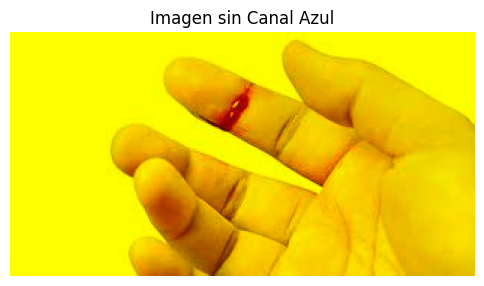

La ruta es una cadena (str).
Forma del array de la imagen: (163, 310, 3)
Imagen sin Canal Azul:
 [[[255 255   0]
  [255 255   0]
  [255 255   0]
  ...
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  ...
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  ...
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 ...

 [[252 252   0]
  [252 252   0]
  [252 252   0]
  ...
  [230 192   0]
  [231 193   0]
  [231 193   0]]

 [[252 252   0]
  [252 252   0]
  [252 252   0]
  ...
  [230 192   0]
  [231 193   0]
  [231 193   0]]

 [[252 252   0]
  [252 252   0]
  [252 252   0]
  ...
  [230 192   0]
  [231 193   0]
  [231 193   0]]]


In [38]:
# Crear y mostrar una nueva imagen sin el Canal Rojo
nueva_imagen_sin_rojo = procesador.crear_imagen_sin_canal("R")
procesador.mostrar_imagen_con_array(nueva_imagen_sin_rojo, 'Imagen sin Canal Rojo')

# Crear y mostrar una nueva imagen sin el Canal Verde
nueva_imagen_sin_verde = procesador.crear_imagen_sin_canal("G")
procesador.mostrar_imagen_con_array(nueva_imagen_sin_verde, 'Imagen sin Canal Verde')

# Crear y mostrar una nueva imagen sin el Canal Azul
nueva_imagen_sin_azul = procesador.crear_imagen_sin_canal("B")
procesador.mostrar_imagen_con_array(nueva_imagen_sin_azul, 'Imagen sin Canal Azul')


Generamos tres imagenes nuevas, cada una sin un canal RGB. Obtenemos su forma y su array para confirmar que continua siendo una imagen con las mismas características que las anteriores. 
Realizando un análisis a simple vista vemos que en la imagen sin el canal azul es más evidente la herida y se puede llegar a visualizar de una mejor manera.

In [39]:
# Calcular intensidad y entropía para imágenes sin un canal
intensidad_sin_rojo, entropia_sin_rojo = procesador.calcular_intensidad_entropia_sin_canal("R")
intensidad_sin_verde, entropia_sin_verde = procesador.calcular_intensidad_entropia_sin_canal("G")
intensidad_sin_azul, entropia_sin_azul = procesador.calcular_intensidad_entropia_sin_canal("B")

print(f"Intensidad promedio de la imagen sin Canal Rojo: {intensidad_sin_rojo}")
print(f"Entropía de la imagen sin Canal Rojo: {entropia_sin_rojo}")

print(f"Intensidad promedio de la imagen sin Canal Verde: {intensidad_sin_verde}")
print(f"Entropía de la imagen sin Canal Verde: {entropia_sin_verde}")

print(f"Intensidad promedio de la imagen sin Canal Azul: {intensidad_sin_azul}")
print(f"Entropía de la imagen sin Canal Azul: {entropia_sin_azul}")


Intensidad promedio de la imagen sin Canal Rojo: 148.33423708687909
Entropía de la imagen sin Canal Rojo: 10.797420857183159
Intensidad promedio de la imagen sin Canal Verde: 96.00427468830398
Entropía de la imagen sin Canal Verde: 10.821288968899523
Intensidad promedio de la imagen sin Canal Azul: 196.01369483475165
Entropía de la imagen sin Canal Azul: 10.811720022596845


Calculamos nuevamente la intensidad promedio y la entropía para las nuevas imagenes sin cada canal y observamos que la imagen con mayor intensidad es la imagen isn el canal azul, la misma que se observa visualmente más evidente la herida y la imagen con mayor entropia es la imagen sin el canal verde casi de la misma magnitud que la del canal azul por lo tanto se concluye que la imagen en la que mejor se aprecia la herida es la imagen sin el canal azul.